In [81]:
from igraph import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read Graphs

In [5]:
neural = Graph.Read('datasets/neural.gml')
political = Graph.Read('datasets/political.gml')
internet = Graph.Read('datasets/internet.gml')
collab = Graph.Read('datasets/collab.gml')

The fourth graph I have chosen i contains the collaboration network of scientists posting preprints on the high-energy theory archive at www.arxiv.org, 1995-1999, as compiled by M. Newman.  The network is weighted, with weights assigned as described in the original papers.

The url for the dataset is: http://www-personal.umich.edu/~mejn/netdata/hep-th.zip

### Report the node which has highest score for following measures

* Degree
* Eccentricity
* Closeness
* Betweenness
* Katz index
* PageRank
* Kleinberg’s Authority score
* Kleinberg’s Hub score.

In [19]:
# Name of network
Network = [
    "Neural network",
    "Political blogs",
    "Internet",
    "Collaborations"
]

In [20]:
# Degree
Degree = [
    neural.degree().index(max(neural.degree())),
    political.degree().index(max(political.degree())),
    internet.degree().index(max(internet.degree())),
    collab.degree().index(max(collab.degree()))
]

In [22]:
# Eccentricity
Eccentricity = [
    neural.eccentricity().index(max(neural.eccentricity())),
    political.eccentricity().index(max(political.eccentricity())),
    internet.eccentricity().index(max(internet.eccentricity())),
    collab.eccentricity().index(max(collab.eccentricity()))
]

In [23]:
#Closeness
Closeness = [
    neural.closeness().index(max(neural.closeness())),
    political.closeness().index(max(political.closeness())),
    internet.closeness().index(max(internet.closeness())),
    collab.closeness().index(max(collab.closeness()))
]

In [24]:
# Betweenness
Betweenness = [
    neural.betweenness().index(max(neural.betweenness())),
    political.betweenness().index(max(political.betweenness())),
    internet.betweenness().index(max(internet.betweenness())),
    collab.betweenness().index(max(collab.betweenness()))
]

In [35]:
# Katz index
Katz_index = [
    None,
    None,
    None,
    None
]

In [27]:
# PageRank
PageRank = [
    neural.pagerank().index(max(neural.pagerank())),
    political.pagerank().index(max(political.pagerank())),
    internet.pagerank().index(max(internet.pagerank())),
    collab.pagerank().index(max(collab.pagerank()))
]

In [31]:
# Kleinberg’s Authority score
Authority_score = [
    neural.authority_score().index(max(neural.authority_score())),
    political.authority_score().index(max(political.authority_score())),
    internet.authority_score().index(max(internet.authority_score())),
    collab.authority_score().index(max(collab.authority_score()))
]

In [34]:
# Kleinberg’s Hub score
Hub_score = [
    neural.hub_score().index(max(neural.hub_score())),
    political.hub_score().index(max(political.hub_score())),
    internet.hub_score().index(max(internet.hub_score())),
    collab.hub_score().index(max(collab.hub_score()))
]

In [36]:
report_dict = [
    ('Network', Network),
    ('Degree', Degree),
    ('Eccentricity', Eccentricity),
    ('Closeness', Closeness),
    ('Betweenness', Betweenness),
    ('Katz index', Katz_index),
    ('PageRank', PageRank),
    ('Kleinberg’s Authority score', Authority_score),
    ('Kleinberg’s Hub score', Hub_score)
]

In [37]:
report = pd.DataFrame.from_items(report_dict)

/anaconda3/envs/igraph/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [38]:
report

,Network,Degree,Eccentricity,Closeness,Betweenness,Katz index,PageRank,Kleinberg’s Authority score,Kleinberg’s Hub score
0,Neural network,44,264,44,177,None,44,44,125
1,Political blogs,854,379,1050,854,None,154,154,511
2,Internet,3,9199,22,3,None,3,3,3
3,Collaborations,86,4779,167,23,None,86,6789,6789


### Generate random graphs

In [98]:
erdos20 = Graph.Erdos_Renyi(n = 20, m = 80)
erdos40 = Graph.Erdos_Renyi(n = 40, m = 120)
barabasi20 = Graph.Barabasi(n = 20, m = 5, directed = False)
barabasi40 = Graph.Barabasi(n = 40, m = 3, directed = False)

In [99]:
# Calculate laplacians
erdos20_lap = erdos20.laplacian()
erdos40_lap = erdos40.laplacian()
barabasi20_lap = barabasi20.laplacian()
barabasi40_lap = barabasi40.laplacian()

In [100]:
# Calculate eigen values and eigen vectors
erdos20_vals, erdos20_vec = np.linalg.eig(erdos20_lap)
erdos40_vals, erdos40_vec = np.linalg.eig(erdos40_lap)
barabasi20_vals, barabasi20_vec = np.linalg.eig(barabasi20_lap)
barabasi40_vals, barabasi40_vec = np.linalg.eig(barabasi40_lap)

### Report the following

* Number of nodes 
* Number of edges 
* Minimum degree
* Maximum degree 
* Average path length
* Diameter
* Global clustering coefficient
* Second smallest eigenvalue 
* Largest eigenvalue

In [15]:
# Name of graph
Graph = [
    'Erdos-Renyi 20',
    'Erdos-Renyi 40',
    'Barabasi 20',
    'Barabasi 40'
]

In [16]:
# Number of nodes
Nodes = [
    erdos20.vcount(),
    erdos40.vcount(),
    barabasi20.vcount(),
    barabasi40.vcount()
]

In [17]:
# Number of edges
Edges = [
    erdos20.ecount(),
    erdos40.ecount(),
    barabasi20.ecount(),
    barabasi40.ecount()
]

In [23]:
# Minimum degree
MinDegree = [
    min(erdos20.degree()),
    min(erdos40.degree()),
    min(barabasi20.degree()),
    min(barabasi40.degree())
]

In [24]:
# Maximum degree
MaxDegree = [
    erdos20.maxdegree(),
    erdos40.maxdegree(),
    barabasi20.maxdegree(),
    barabasi40.maxdegree()
]

In [25]:
# Average path length
AvgPathLength = [
    erdos20.average_path_length(),
    erdos40.average_path_length(),
    barabasi20.average_path_length(),
    barabasi40.average_path_length()
]

In [26]:
# Global clustering coefficient
GlobalClusteringCoefficient = [
    erdos20.transitivity_undirected(),
    erdos40.transitivity_undirected(),
    barabasi20.transitivity_undirected(),
    barabasi40.transitivity_undirected()
]

In [36]:
# Second smallest eigen value
SmallEigValue = [
    np.sort(erdos20_vals)[1],
    np.sort(erdos40_vals)[1],
    np.sort(barabasi20_vals)[1],
    np.sort(barabasi40_vals)[1]
]

In [34]:
# Largest eigen value
BigEigValue = [
    np.amax(erdos20_vals),
    np.amax(erdos40_vals),
    np.amax(barabasi20_vals),
    np.amax(barabasi40_vals)
]

In [37]:
report_dict = [
    ('Network', Graph),
    ('Number of nodes', Nodes),
    ('Number of edges', Edges),
    ('Minimum Degree', MinDegree),
    ('Maximum Degree', MaxDegree),
    ('Average Path Length', AvgPathLength),
    ('Global Clustering Coefficient', GlobalClusteringCoefficient),
    ('Second Smallest Eigen Value', SmallEigValue),
    ('Largest Eigen Value', BigEigValue)
]

In [38]:
report = pd.DataFrame.from_items(report_dict)

c:\users\krupal.jadhav\appdata\local\continuum\miniconda3\envs\igraph\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [39]:
report

,Network,Number of nodes,Number of edges,Minimum Degree,Maximum Degree,Average Path Length,Global Clustering Coefficient,Second Smallest Eigen Value,Largest Eigen Value
0,Erdos-Renyi 20,20,80,5,12,1.589474,0.412252,3.594524,14.083235
1,Erdos-Renyi 40,40,120,3,11,2.197436,0.144796,1.501584,13.221036
2,Barabasi 20,20,85,5,18,1.552632,0.519298,4.058273,19.051443
3,Barabasi 40,40,114,3,26,2.015385,0.224799,1.402212,27.106305


### Recompute eigen values and vectors (as sorting above shifted the positions)

In [101]:
erdos20_vals, erdos20_vec = np.linalg.eig(erdos20_lap)
erdos40_vals, erdos40_vec = np.linalg.eig(erdos40_lap)
barabasi20_vals, barabasi20_vec = np.linalg.eig(barabasi20_lap)
barabasi40_vals, barabasi40_vec = np.linalg.eig(barabasi40_lap)

In [102]:
erdos20_dict = dict(zip(erdos20_vals, erdos20_vec))
erdos40_dict = dict(zip(erdos40_vals, erdos40_vec))
barabasi20_dict = dict(zip(barabasi20_vals, barabasi20_vec))
barabasi40_dict = dict(zip(barabasi40_vals, barabasi40_vec))

In [103]:
keys_erdos = erdos20_dict.keys()
keys_erdos.sort()
keys_barabasi = barabasi20_dict.keys()
keys_barabasi.sort()

In [104]:
erdos_small_eig_vec = erdos20_dict[keys_erdos[1]]
erdos_large_eig_vec = erdos20_dict[keys_erdos[len(keys_erdos) - 1]]
barabasi_small_eig_vec = barabasi20_dict[keys_barabasi[1]]
barabasi_large_eig_vec = barabasi20_dict[keys_barabasi[len(keys_barabasi) - 1]]

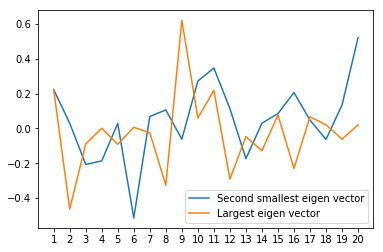

In [115]:
node_id = [i + 1 for i in range(20)]
plt.plot(node_id, erdos_small_eig_vec, label = 'Second smallest eigen vector')
plt.plot(node_id, erdos_large_eig_vec, label = 'Largest eigen vector')
plt.xlabel('Node IDs')
plt.ylabel('Value of Eigen Vector')
plt.title('Erdos-Renyi Netw')
plt.xticks(node_id)
plt.legend()

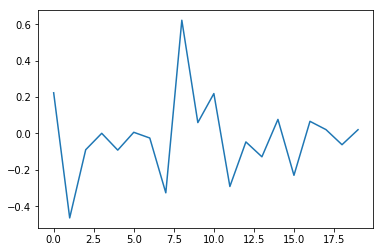

In [106]:
plt.plot()

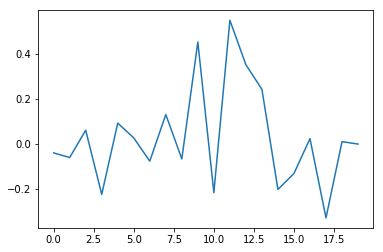

In [107]:
plt.plot(barabasi_small_eig_vec)

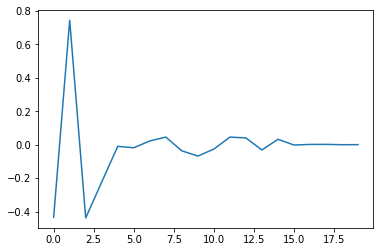

In [108]:
plt.plot(barabasi_large_eig_vec)

In [109]:
erdos_small_eig_vec

array([ 0.2236068 ,  0.03022825, -0.20704474, -0.18710959,  0.02844605,
       -0.51498235,  0.06837561,  0.10650501, -0.06210502,  0.27229536,
        0.34726906,  0.11453745, -0.1741786 ,  0.02992803,  0.08517197,
        0.20650009,  0.04763489, -0.06340605,  0.13401734,  0.52161029])